### Human Activity Recognisation Dataset

Human Activity Recognition - HAR - has emerged as a key research area in the last years and is gaining increasing attention by the pervasive computing research community, especially for the development of context-aware systems. There are many potential applications for HAR, like: elderly monitoring, life log systems for monitoring energy expenditure and for supporting weight-loss programs, and digital assistants for weight lifting exercises.

Read more: https://github.com/Sarosh09/Human-Activity-Recognition

In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.naive_bayes import GaussianNB      
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score


In [2]:
# Import data
training = pd.read_csv("har_train.csv")
test =  pd.read_csv("har_validate.csv")
training.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,...,36,0.03,0.00,-0.02,192,203,-215,-17,654,476
1,A,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,...,36,0.02,0.00,-0.02,192,203,-216,-18,661,473
2,A,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,...,36,0.03,-0.02,0.00,196,204,-213,-18,658,469
3,A,1.48,8.05,-94.4,3,0.02,0.0,-0.03,-22,3,...,36,0.02,-0.02,0.00,189,206,-214,-16,658,469
4,A,1.45,8.06,-94.4,3,0.02,0.0,-0.02,-21,4,...,36,0.02,-0.02,-0.03,193,203,-215,-9,660,478


In [3]:
training.shape

(13737, 53)

In [4]:
training.columns

Index(['classe', 'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'ma

In [5]:
test.shape

(5885, 53)

In [6]:
training.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,...,13737.000000,13737.000000,13737.00000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000
mean,64.503131,0.191794,-10.941653,11.317973,-0.004831,0.040013,-0.130328,-5.424620,30.152362,-72.748271,...,34.717551,0.159878,0.06067,0.142131,-61.736915,163.438087,-55.328383,-311.819611,379.741210,391.859212
std,62.768030,22.363296,95.374331,7.744534,0.206729,0.078435,0.241559,29.697752,28.560242,100.410466,...,10.089365,0.629520,2.15904,0.601628,180.263200,200.714691,138.501162,346.766862,511.403542,370.396450
min,-28.900000,-54.900000,-180.000000,0.000000,-1.040000,-0.640000,-1.350000,-120.000000,-69.000000,-269.000000,...,0.000000,-3.360000,-7.02000,-8.090000,-498.000000,-585.000000,-410.000000,-1280.000000,-892.000000,-973.000000
25%,1.100000,1.670000,-88.300000,3.000000,-0.030000,0.000000,-0.200000,-21.000000,3.000000,-162.000000,...,29.000000,-0.220000,-1.46000,-0.180000,-178.000000,54.000000,-182.000000,-613.000000,-3.000000,187.000000
50%,114.000000,5.260000,-12.700000,17.000000,0.030000,0.020000,-0.100000,-15.000000,35.000000,-152.000000,...,36.000000,0.050000,0.03000,0.080000,-57.000000,200.000000,-39.000000,-378.000000,595.000000,509.000000
75%,123.000000,14.800000,13.600000,18.000000,0.110000,0.110000,-0.020000,-5.000000,61.000000,27.000000,...,41.000000,0.560000,1.64000,0.490000,76.000000,312.000000,26.000000,-72.000000,737.000000,652.000000
max,162.000000,60.300000,179.000000,28.000000,2.220000,0.640000,1.620000,83.000000,164.000000,105.000000,...,73.000000,3.520000,6.13000,4.310000,477.000000,589.000000,291.000000,666.000000,1480.000000,1090.000000


In [ ]:
test.describe()

In [7]:
training['classe'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [9]:
training['classe'].value_counts()

A    3906
B    2658
E    2525
C    2396
D    2252
Name: classe, dtype: int64

In [8]:
training['classe'].value_counts()/len(training['classe'])

A    0.284342
B    0.193492
E    0.183810
C    0.174419
D    0.163937
Name: classe, dtype: float64

In [10]:
# Create the X and Y
xtrain = training.drop('classe', axis=1)
ytrain = training.loc[:, 'classe']      #training['classe']

xtest = test.drop('classe', axis=1)
ytest = test.loc[:, 'classe']

In [11]:
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model
model.fit(xtrain, ytrain)

GaussianNB()

In [12]:
# Predict Output 
pred = model.predict(xtest)
mat = confusion_matrix(ytest, pred)       #Multiclass Confusion Matrix
print(mat)

[[1070   95  262  212   35]
 [ 127  685  145   76  106]
 [ 223  106  512  136   49]
 [ 102   35  271  441  115]
 [  51  239   95  143  554]]


[]

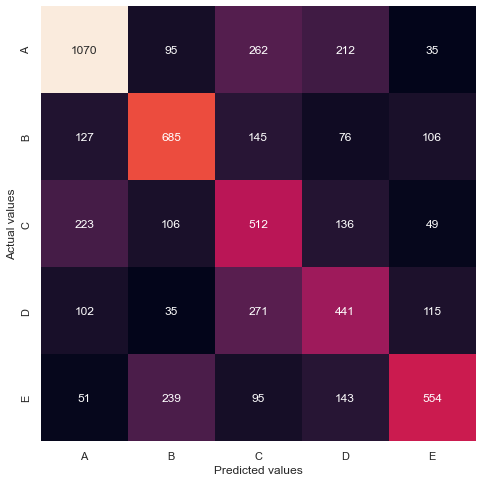

In [13]:
# Plot Confusion Matrix
plt.figure(figsize=(10,8))
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.plot()

/Users/amritapanjwani/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


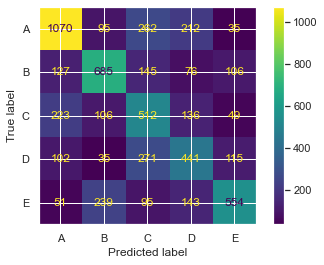

In [14]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, xtest, ytest)

In [15]:
# Printing the precision and recall, among other metrics
print(classification_report(pred, ytest, labels=["A", "B", "C","D","E"]))

              precision    recall  f1-score   support

           A       0.64      0.68      0.66      1573
           B       0.60      0.59      0.60      1160
           C       0.50      0.40      0.44      1285
           D       0.46      0.44      0.45      1008
           E       0.51      0.64      0.57       859

    accuracy                           0.55      5885
   macro avg       0.54      0.55      0.54      5885
weighted avg       0.55      0.55      0.55      5885



In [16]:
train_pred = model.predict(xtrain)
print(classification_report(train_pred, ytrain, labels=["A", "B", "C","D","E"]))

              precision    recall  f1-score   support

           A       0.64      0.67      0.66      3699
           B       0.60      0.62      0.61      2612
           C       0.50      0.39      0.44      3077
           D       0.48      0.45      0.46      2394
           E       0.51      0.66      0.58      1955

    accuracy                           0.56     13737
   macro avg       0.55      0.56      0.55     13737
weighted avg       0.55      0.56      0.55     13737



In [17]:
# it is performing poor in training and testing both and hence it is underfitting
#we should go ahead increase the complexity of the model
#add more features (not possible right now)

#use gridsearch (assignment: search the hyperparameters of NB ML algo)

#Try another models